# Strategy -- Moving Average Crossover

In this document we will be testing moving average crossover strategies.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Imports

### General libraries

These are the general Python libraries that are used.

In [2]:
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

## Custom libraries

These are the custom libraries that hold the framework to perform and analyze a backtest.

In [3]:
import poloniex as plnx
import ta_lib as ta
import signals as sg
import backtest as bt

## Backtest

To run a backtest trading simulation we will need to set it up with parameters. The parameters will be explained per section.

### Chart data

We are using data from http://www.poloniex.com API. Our test is done on the `USDT_BTC` pair for three months worth of data.

In [21]:
pair = 'USDT_BTC'
timeframe = 30 * 60
end = datetime.utcnow()
start = end - timedelta(days=30*3)

chart = plnx.get_chart(pair, timeframe, start, end)

**Technical indicators**

We will be using the following technical indicators to generate signals:

1. EMA7
2. EMA23

In [22]:
ta.ema(chart)
ta.ema(chart, 23)
ta.bbands(chart)

**Signals**

We will be using the EMA's to generate crossover signals.

In [23]:
sg.init(chart)
sg.moving_average_crossover(chart, 'ema7', 'ema23')
#sg.moving_average_crossover(chart, 'ema23', 'ema7')

**Backtest simulation**

We will be using the following parameters:

1. Start with $1000
2. Lot size is 10% of our balance
3. No fees
4. 1x leverage
5. A limit stop loss that is 10% offset of our entry price

In [24]:
sim = bt.TradingSim(pd.DataFrame(chart))
sim.balance = 1000
sim.lot_size = 1
sim.fee_percentage = 0.00075
sim.leverage = 1
sim.stop_loss_type = 'limit'
sim.stop_loss_percentage = 0.01
sim.run()

In [25]:
print('Final balance: {}'.format(sim.balance))

Final balance: 523.396291133834


**Backtest report**

The following statistics are the result of the backtest.

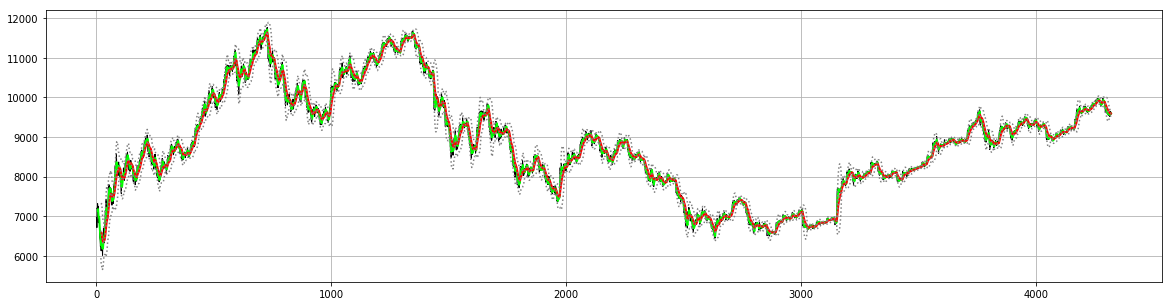

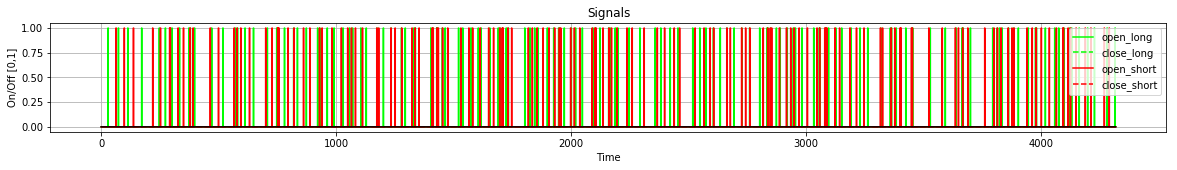

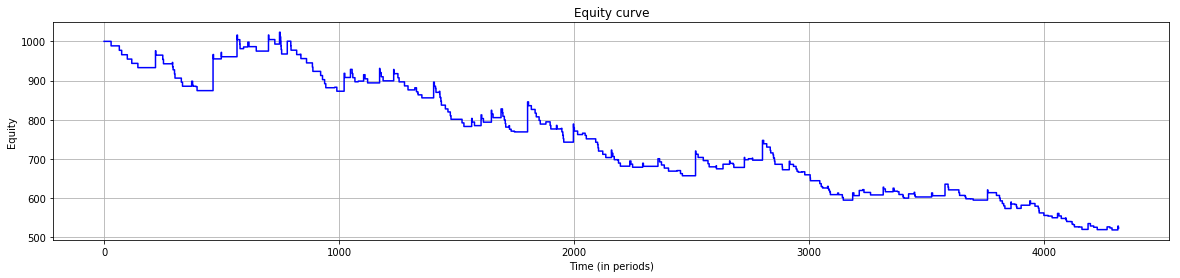

In [26]:
analysis = bt.AnalyzeSim(sim)
analysis.chart().show()
analysis.signals().show()
analysis.equity_curve().show()

In [10]:
analysis.summary()

There are 1188 trades.


In [11]:
analysis.roe()

-0.94573051734640756

In [12]:
analysis.paid_fees()

490.03645087845251

In [13]:
analysis.trades

state position_type  lot_size_base  lot_size_base_leveraged  \
0     closed          long    1000.000000              1000.000000   
1     closed         short    1002.100620              1002.100620   
2     closed          long    1005.495937              1005.495937   
3     closed         short    1004.033651              1004.033651   
4     closed          long     957.708719               957.708719   
5     closed         short     959.673687               959.673687   
6     closed          long     905.944436               905.944436   
7     closed         short     918.457344               918.457344   
8     closed          long     944.309813               944.309813   
9     closed         short     958.195028               958.195028   
10    closed          long     951.894540               951.894540   
11    closed         short     969.726139               969.726139   
12    closed          long     937.375828               937.375828   
13    closed         short     943.902359               943.902359   
14    closed          long     953.086810               953.086810   
15    closed         short     951.057157               951.057157   
16    closed          long     954.565486               954.565486   
17    closed         short     952.320376               952.320376   
18    closed          long     964.975076               964.975076   
19    closed         short     909.083756               909.083756   
20    closed          long     854.104360               854.104360   
21    closed         short     851.885331               851.885331   
22    closed          long     856.891234               856.891234   
23    closed         short     845.858740               845.858740   
24    closed          long     860.749305               860.749305   
25    closed         short     861.684621               861.684621   
26    closed          long     846.836847               846.836847   
27    closed         short     849.312963               849.312963   
28    closed          long     812.426516               812.426516   
29    closed         short     813.427859               813.427859   
...      ...           ...            ...                      ...   
1158  closed          long      52.421487                52.421487   
1159  closed         short      53.112158                53.112158   
1160  closed          long      53.869886                53.869886   
1161  closed         short      54.150509                54.150509   
1162  closed          long      54.513789                54.513789   
1163  closed         short      54.910446                54.910446   
1164  closed          long      55.130023                55.130023   
1165  closed         short      55.122249                55.122249   
1166  closed          long      55.379681                55.379681   
1167  closed         short      54.106726                54.106726   
1168  closed          long      54.853364                54.853364   
1169  closed         short      55.232062                55.232062   
1170  closed          long      54.934023                54.934023   
1171  closed         short      55.059764                55.059764   
1172  closed          long      55.213940                55.213940   
1173  closed         short      55.358077                55.358077   
1174  closed          long      55.226750                55.226750   
1175  closed         short      55.513814                55.513814   
1176  closed          long      55.511898                55.511898   
1177  closed         short      55.911370                55.911370   
1178  closed          long      55.797067                55.797067   
1179  closed         short      56.543304                56.543304   
1180  closed          long      54.754352                54.754352   
1181  closed         short      55.116073                55.116073   
1182  closed          long      55.287135                55.287135   
1183  closed     